# Pre-processing and N-grams
Adapted from: https://github.com/datavisiondallas/NLP-Walkthrough/blob/main/reviews.ipynb

From LAB P04

## 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns                  # Data visualization library built on top of Matplotlib
from wordcloud import WordCloud
from collections import Counter

import nltk                            # Popular (and old) open-source library in Python
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams


## 2. Load dataset

In [2]:
# Define the column names based on the data format description
columns = ['title', 'from', 'genre', 'director', 'plot']

# Load the dataset
file_path = 'train.txt'
train = pd.read_csv(file_path, delimiter= "\t", names=columns)

# Create a new dataframe "data" with just the columns 'plot' and 'genre'
data = train[['plot', 'genre']]

# Display the first few rows and the number of lines
print(data.head())
print(f"Number of lines: {len(data)}")

                                                plot    genre
0  Sekhar (Tarun) is a graduate from IIM and work...  romance
1  Kris Fowles (Katie Cassidy) goes to the Spring...   horror
2  Cynthia is traumatized by the death of her bab...   horror
3  Four friends, Gangu (Jackie Shroff), Abdul (Na...    crime
4  Crisis in a middle-class family when the son f...    drama
Number of lines: 8041


## 3. Basic statistics

In [3]:
# Check for missing values in the data dataframe
missing_values = data.isnull().sum()

# Display the number of missing values for each column
print(missing_values)

# Check if all values in 'plot' and 'genre' columns are strings
plot_string_check = data['plot'].apply(lambda x: isinstance(x, str)).all()
genre_string_check = data['genre'].apply(lambda x: isinstance(x, str)).all()

# Display whether all values in each column are strings
print(f"\nAre all values in 'plot' column strings? {plot_string_check}")
print(f"Are all values in 'genre' column strings? {genre_string_check}")

plot     0
genre    0
dtype: int64

Are all values in 'plot' column strings? True
Are all values in 'genre' column strings? True


In [4]:
## Lines length analysis
data['characters'] = data['plot'].apply(len)

text_characters_summary = data['characters'].describe() # count, mean, std, ...

# Lines length analysis (counting words instead of characters)
data['Word_Count'] = data['plot'].apply(lambda x: len(x.split()))
text_words_summary = data['Word_Count'].describe()

# Genre distribution
genre_counts = data['genre'].value_counts().sort_index()

# 45481 is the number of lines
print(f'''\n{'-'*60}
Lines length by number of characters\n{text_characters_summary}\n{'-'*60}
Lines length by number of words\n{text_words_summary}\n{'-'*60}
Number of lines for each genre :\n{genre_counts}
''')


------------------------------------------------------------
Lines length by number of characters
count     8041.000000
mean      2138.460142
std       1794.564314
min         15.000000
25%        643.000000
50%       1629.000000
75%       3413.000000
max      16605.000000
Name: characters, dtype: float64
------------------------------------------------------------
Lines length by number of words
count    8041.000000
mean      370.330432
std       312.995750
min         2.000000
25%       110.000000
50%       281.000000
75%       590.000000
max      3148.000000
Name: Word_Count, dtype: float64
------------------------------------------------------------
Number of lines for each genre :
genre
action       1059
animation     535
comedy       1193
crime         541
drama        1676
horror       1108
romance       886
sci-fi        214
western       829
Name: count, dtype: int64



C:\Users\anajf\AppData\Local\Temp\ipykernel_1912\1199521812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['characters'] = data['plot'].apply(len)
C:\Users\anajf\AppData\Local\Temp\ipykernel_1912\1199521812.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Word_Count'] = data['plot'].apply(lambda x: len(x.split()))


## 4. Some nice figures

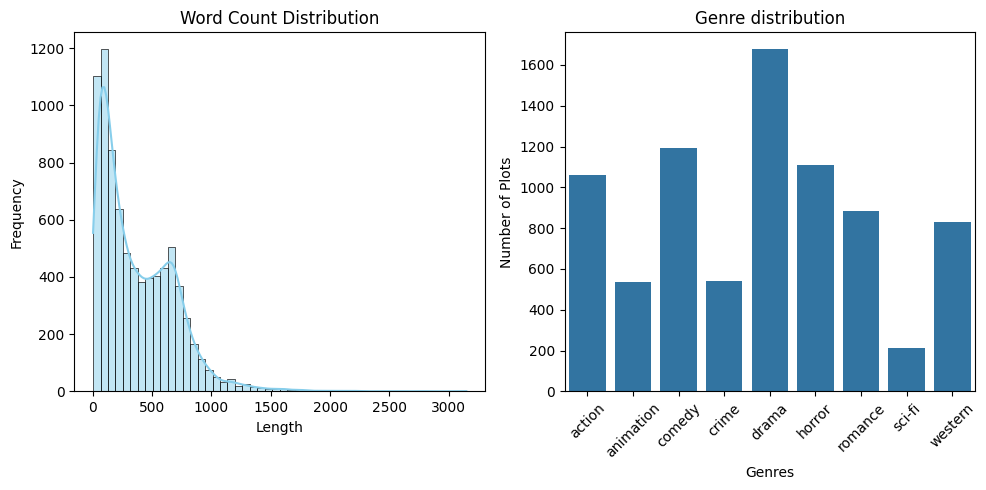

In [5]:
# Plotting the Lines Length Distribution and Characters Distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Lines length distribution (by words)
sns.histplot(data['Word_Count'], bins=50, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Word Count Distribution')
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Frequency')

# Genre distribution
sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axes[1])
axes[1].set_title('Genre distribution')
axes[1].set_xlabel('Genres')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Number of Plots')

plt.tight_layout()
plt.show()


## 5. Which are the most popular words?

### 5.1 Necessary downloads

In [6]:
# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anajf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anajf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anajf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### 5.2 Pre-processing

In [7]:
# Tokenization split plot into single words (tokens) <- more sophisticated than before
data['Tokens'] = data['plot'].apply(lambda x: word_tokenize(x.lower()))

# Alternative:
# data['Tokens'] = data['text'].apply(lambda x: nltk.wordpunct_tokenize(x.lower()))

# Filter out stop words
stop_words = set(stopwords.words('english'))
# stop_words = ['a', 'the', 'and'] # pick them manually if the previous list is too radical

def filter_tokens(tokens):
    return [word for word in tokens if word.isalpha() and word not in stop_words]
data['Filtered_Tokens'] = data['Tokens'].apply(filter_tokens)

data.head() # Check

,plot,genre,characters,Word_Count,Tokens,Filtered_Tokens
0,Sekhar (Tarun) is a graduate from IIM and work...,romance,865,154,"[sekhar, (, tarun, ), is, a, graduate, from, i...","[sekhar, tarun, graduate, iim, works, business..."
1,Kris Fowles (Katie Cassidy) goes to the Spring...,horror,3773,659,"[kris, fowles, (, katie, cassidy, ), goes, to,...","[kris, fowles, katie, cassidy, goes, springwoo..."
2,Cynthia is traumatized by the death of her bab...,horror,4071,747,"[cynthia, is, traumatized, by, the, death, of,...","[cynthia, traumatized, death, baby, leaving, b..."
3,"Four friends, Gangu (Jackie Shroff), Abdul (Na...",crime,2279,393,"[four, friends, ,, gangu, (, jackie, shroff, )...","[four, friends, gangu, jackie, shroff, abdul, ..."
4,Crisis in a middle-class family when the son f...,drama,196,35,"[crisis, in, a, middle-class, family, when, th...","[crisis, family, son, falls, love, father, mis..."


5.3 Finds the most common words/tokens

In [8]:
# Flatten the list of tokens and count the words
all_words = [word for tokens in data['Filtered_Tokens'] for word in tokens]
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(20)

print(most_common_words[:10])

# [('one', 6614), ('back', 5622), ('father', 5086), ('tells', 4560), ('two', 4498), ('house', 4293), ('man', 4063), ('later', 4020), ('love', 3937), ('home', 3867)]

[('one', 6614), ('back', 5622), ('father', 5086), ('tells', 4560), ('two', 4498), ('house', 4293), ('man', 4063), ('later', 4020), ('love', 3937), ('home', 3867)]


C:\Users\anajf\AppData\Local\Temp\ipykernel_1912\1062543874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in most_common_words], y=[word for word, count in most_common_words], palette='viridis')


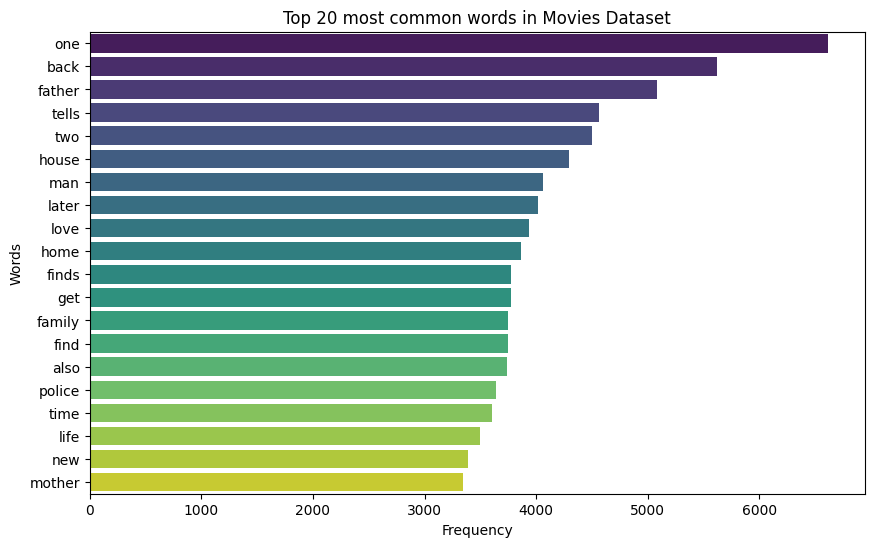

In [9]:
# Plotting the word frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=[count for word, count in most_common_words], y=[word for word, count in most_common_words], palette='viridis')
plt.title('Top 20 most common words in Movies Dataset')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

## 6. Maybe we should check expressions and not just words


### 6.1 Generating bigrams and trigrams

In [10]:
# Function to generate and count ngrams
def generate_ngrams(tokens_list, n):
    ngrams_list = ngrams(tokens_list, n)
    ngrams_counts = Counter(ngrams_list)
    return ngrams_counts

# Generating bigrams (2-grams) and trigrams (3-grams)
data['Bigrams'] = data['Filtered_Tokens'].apply(lambda x: generate_ngrams(x, 2))
data['Trigrams'] = data['Filtered_Tokens'].apply(lambda x: generate_ngrams(x, 3))

data.head()

,plot,genre,characters,Word_Count,Tokens,Filtered_Tokens,Bigrams,Trigrams
0,Sekhar (Tarun) is a graduate from IIM and work...,romance,865,154,"[sekhar, (, tarun, ), is, a, graduate, from, i...","[sekhar, tarun, graduate, iim, works, business...","{('sekhar', 'tarun'): 1, ('tarun', 'graduate')...","{('sekhar', 'tarun', 'graduate'): 1, ('tarun',..."
1,Kris Fowles (Katie Cassidy) goes to the Spring...,horror,3773,659,"[kris, fowles, (, katie, cassidy, ), goes, to,...","[kris, fowles, katie, cassidy, goes, springwoo...","{('kris', 'fowles'): 1, ('fowles', 'katie'): 1...","{('kris', 'fowles', 'katie'): 1, ('fowles', 'k..."
2,Cynthia is traumatized by the death of her bab...,horror,4071,747,"[cynthia, is, traumatized, by, the, death, of,...","[cynthia, traumatized, death, baby, leaving, b...","{('cynthia', 'traumatized'): 1, ('traumatized'...","{('cynthia', 'traumatized', 'death'): 1, ('tra..."
3,"Four friends, Gangu (Jackie Shroff), Abdul (Na...",crime,2279,393,"[four, friends, ,, gangu, (, jackie, shroff, )...","[four, friends, gangu, jackie, shroff, abdul, ...","{('four', 'friends'): 1, ('friends', 'gangu'):...","{('four', 'friends', 'gangu'): 1, ('friends', ..."
4,Crisis in a middle-class family when the son f...,drama,196,35,"[crisis, in, a, middle-class, family, when, th...","[crisis, family, son, falls, love, father, mis...","{('crisis', 'family'): 1, ('family', 'son'): 1...","{('crisis', 'family', 'son'): 1, ('family', 's..."


### 6.2 Counting bigrams and trigrams

In [11]:
# Initialize counters for bigrams and trigrams
bigram_counts = Counter()
trigram_counts = Counter()

# Sum the counts
for bigram_counter in data['Bigrams']:
    bigram_counts.update(bigram_counter)

for trigram_counter in data['Trigrams']:
    trigram_counts.update(trigram_counter)

# Most common bigrams and trigrams
most_common_bigrams = bigram_counts.most_common(20)
most_common_trigrams = trigram_counts.most_common(20)

print(most_common_bigrams)
print(most_common_trigrams)

#[(('next', 'day'), 864), (('one', 'day'), 741), (('falls', 'love'), 634), (('new', 'york'), 595), (('next', 'morning'), 525), (('years', 'later'), 414), (('film', 'ends'), 405), (('fall', 'love'), 375), (('one', 'night'), 367), (('get', 'married'), 329), (('united', 'states'), 321), (('high', 'school'), 320), (('young', 'woman'), 309), (('returns', 'home'), 304), (('young', 'man'), 303), (('los', 'angeles'), 299), (('police', 'officer'), 289), (('best', 'friend'), 272), (('back', 'home'), 246), (('years', 'ago'), 239)]
#[(('new', 'york', 'city'), 233), (('world', 'war', 'ii'), 98), (('story', 'revolves', 'around'), 51), (('start', 'new', 'life'), 48), (('film', 'revolves', 'around'), 43), (('one', 'last', 'time'), 43), (('forms', 'rest', 'story'), 42), (('second', 'world', 'war'), 41), (('young', 'woman', 'named'), 40), (('american', 'civil', 'war'), 38), (('love', 'first', 'sight'), 37), (('new', 'year', 'eve'), 36), (('receives', 'phone', 'call'), 36), (('three', 'years', 'later'), 34), (('one', 'year', 'later'), 32), (('spend', 'time', 'together'), 32), (('become', 'good', 'friends'), 31), (('young', 'boy', 'named'), 31), (('meets', 'falls', 'love'), 30), (('back', 'new', 'york'), 30)]


[(('next', 'day'), 864), (('one', 'day'), 741), (('falls', 'love'), 634), (('new', 'york'), 595), (('next', 'morning'), 525), (('years', 'later'), 414), (('film', 'ends'), 405), (('fall', 'love'), 375), (('one', 'night'), 367), (('get', 'married'), 329), (('united', 'states'), 321), (('high', 'school'), 320), (('young', 'woman'), 309), (('returns', 'home'), 304), (('young', 'man'), 303), (('los', 'angeles'), 299), (('police', 'officer'), 289), (('best', 'friend'), 272), (('back', 'home'), 246), (('years', 'ago'), 239)]
[(('new', 'york', 'city'), 233), (('world', 'war', 'ii'), 98), (('story', 'revolves', 'around'), 51), (('start', 'new', 'life'), 48), (('film', 'revolves', 'around'), 43), (('one', 'last', 'time'), 43), (('forms', 'rest', 'story'), 42), (('second', 'world', 'war'), 41), (('young', 'woman', 'named'), 40), (('american', 'civil', 'war'), 38), (('love', 'first', 'sight'), 37), (('new', 'year', 'eve'), 36), (('receives', 'phone', 'call'), 36), (('three', 'years', 'later'), 34

### 6.3 Nice Figures

C:\Users\anajf\AppData\Local\Temp\ipykernel_1912\4038002553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for bigram, count in most_common_bigrams], y=[' '.join(bigram) for bigram, count in most_common_bigrams], ax=axes[0], palette='viridis')
C:\Users\anajf\AppData\Local\Temp\ipykernel_1912\4038002553.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for trigram, count in most_common_trigrams], y=[' '.join(trigram) for trigram, count in most_common_trigrams], ax=axes[1], palette='viridis')


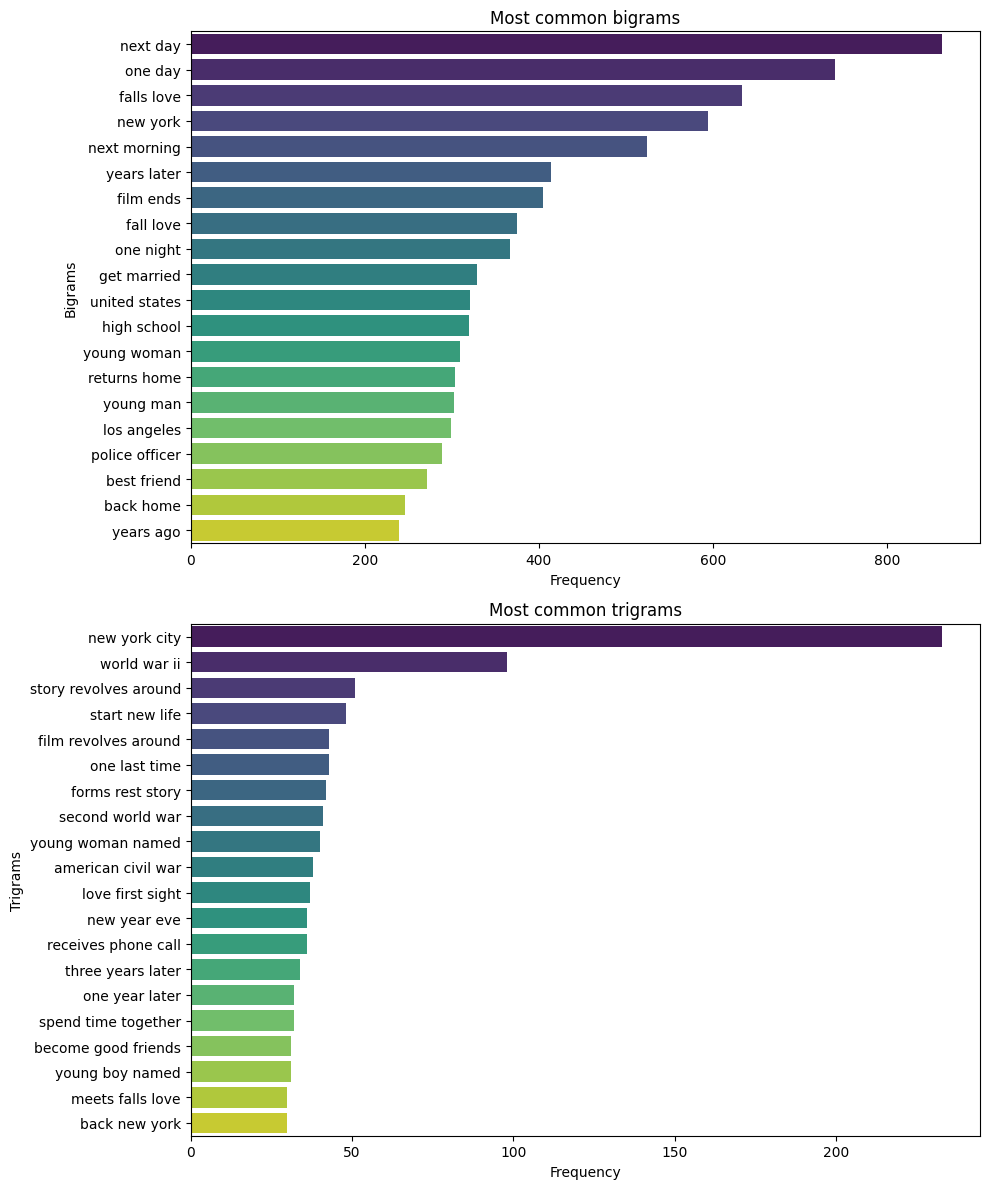

In [12]:
# Plotting the most common bigrams and trigrams
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Bigrams
sns.barplot(x=[count for bigram, count in most_common_bigrams], y=[' '.join(bigram) for bigram, count in most_common_bigrams], ax=axes[0], palette='viridis')
axes[0].set_title('Most common bigrams')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Bigrams')

# Trigrams
sns.barplot(x=[count for trigram, count in most_common_trigrams], y=[' '.join(trigram) for trigram, count in most_common_trigrams], ax=axes[1], palette='viridis')
axes[1].set_title('Most common trigrams')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Trigrams')

plt.tight_layout()
plt.show()


### 6.4 Bigrams and Trigrams by genre

In [13]:
# Function to aggregate and count n-grams for each rating
def aggregate_ngrams_by_genre(data, n):
    ngram_counts_by_genre = {}
    for genre in sorted(data['genre'].unique()):
        # Filter lines for the specific genre
        genre_data = data[data['genre'] == genre]['Filtered_Tokens']

        # Flatten the list of filtered tokens for the specific genre
        all_filtered_tokens_genre = [token for sublist in genre_data for token in sublist]

        # Generating and counting ngrams for the specific genre
        ngram_counts = generate_ngrams(all_filtered_tokens_genre, n)

        # Most common ngrams for the specific rating
        ngram_counts_by_genre[genre] = ngram_counts.most_common(10)

    return ngram_counts_by_genre

# Aggregating and counting bigrams and trigrams for each rating
bigrams_by_genre = aggregate_ngrams_by_genre(data, 2)
trigrams_by_genre = aggregate_ngrams_by_genre(data, 3)

print(bigrams_by_genre)
print(trigrams_by_genre)

#{'action': [(('police', 'officer'), 115), (('falls', 'love'), 115), (('one', 'day'), 113), (('united', 'states'), 90), (('next', 'day'), 89), (('new', 'york'), 87), (('hong', 'kong'), 84), (('comes', 'know'), 72), (('los', 'angeles'), 72), (('film', 'ends'), 63)], 'animation': [(('next', 'day'), 66), (('tom', 'jerry'), 51), (('next', 'morning'), 50), (('bugs', 'bunny'), 46), (('runs', 'away'), 44), (('one', 'day'), 42), (('tom', 'tries'), 37), (('causing', 'tom'), 36), (('super', 'saiyan'), 33), (('tom', 'chases'), 32)], 'comedy': [(('next', 'day'), 139), (('new', 'york'), 122), (('high', 'school'), 105), (('next', 'morning'), 83), (('one', 'day'), 77), (('best', 'friend'), 67), (('falls', 'love'), 66), (('young', 'man'), 61), (('film', 'ends'), 56), (('los', 'angeles'), 55)], 'crime': [(('ah', 'chai'), 46), (('new', 'york'), 43), (('hong', 'kong'), 36), (('one', 'day'), 25), (('los', 'angeles'), 25), (('next', 'day'), 24), (('scotland', 'yard'), 23), (('police', 'officer'), 22), (('district', 'attorney'), 22), (('john', 'allen'), 22)], 'drama': [(('one', 'day'), 222), (('next', 'day'), 147), (('falls', 'love'), 133), (('new', 'york'), 114), (('returns', 'home'), 106), (('film', 'ends'), 103), (('years', 'later'), 98), (('young', 'man'), 96), (('one', 'night'), 86), (('next', 'morning'), 83)], 'horror': [(('next', 'day'), 239), (('next', 'morning'), 163), (('van', 'helsing'), 119), (('one', 'night'), 102), (('years', 'later'), 101), (('high', 'school'), 88), (('still', 'alive'), 84), (('young', 'woman'), 79), (('years', 'ago'), 77), (('returns', 'home'), 70)], 'romance': [(('falls', 'love'), 218), (('one', 'day'), 171), (('get', 'married'), 161), (('fall', 'love'), 152), (('new', 'york'), 106), (('comes', 'know'), 92), (('next', 'day'), 91), (('years', 'later'), 60), (('film', 'ends'), 55), (('best', 'friend'), 54)], 'sci-fi': [(('back', 'earth'), 23), (('los', 'angeles'), 22), (('united', 'states'), 21), (('next', 'morning'), 15), (('next', 'day'), 14), (('air', 'force'), 12), (('big', 'buddha'), 12), (('van', 'gorder'), 12), (('time', 'travel'), 10), (('space', 'station'), 10)], 'western': [(('civil', 'war'), 83), (('wagon', 'train'), 80), (('two', 'men'), 58), (('next', 'day'), 55), (('united', 'states'), 49), (('gene', 'autry'), 46), (('new', 'mexico'), 45), (('cattle', 'drive'), 43), (('old', 'man'), 40), (('leave', 'town'), 40)]}
#{'action': [(('new', 'york', 'city'), 43), (('kota', 'srinivasa', 'rao'), 22), (('de', 'la', 'vega'), 18), (('forms', 'rest', 'story'), 15), (('gains', 'upper', 'hand'), 14), (('decides', 'take', 'revenge'), 13), (('hong', 'kong', 'police'), 11), (('corrupt', 'police', 'officer'), 10), (('start', 'new', 'life'), 9), (('assistant', 'commissioner', 'police'), 9)], 'animation': [(('new', 'york', 'city'), 18), (('junior', 'detective', 'league'), 18), (('tom', 'chases', 'jerry'), 16), (('red', 'siamese', 'cats'), 15), (('legendary', 'super', 'saiyan'), 11), (('king', 'koo', 'koo'), 9), (('douse', 'drive', 'genesect'), 8), (('one', 'last', 'time'), 7), (('hundred', 'acre', 'wood'), 7), (('super', 'saiyan', 'god'), 7)], 'comedy': [(('new', 'york', 'city'), 41), (('second', 'world', 'war'), 14), (('khyi', 'yang', 'po'), 14), (('fourth', 'form', 'girls'), 13), (('story', 'revolves', 'around'), 12), (('six', 'months', 'later'), 11), (('world', 'war', 'ii'), 11), (('back', 'new', 'york'), 11), (('three', 'months', 'later'), 11), (('old', 'mother', 'riley'), 10)], 'crime': [(('new', 'york', 'city'), 14), (('li', 'ah', 'chai'), 9), (('large', 'sum', 'money'), 7), (('world', 'war', 'ii'), 6), (('becomes', 'prime', 'suspect'), 5), (('safe', 'deposit', 'box'), 5), (('hong', 'kong', 'police'), 5), (('back', 'hong', 'kong'), 5), (('start', 'new', 'life'), 5), (('receives', 'phone', 'call'), 4)], 'drama': [(('new', 'york', 'city'), 45), (('world', 'war', 'ii'), 34), (('second', 'world', 'war'), 23), (('film', 'revolves', 'around'), 15), (('one', 'last', 'time'), 14), (('first', 'world', 'war'), 12), (('film', 'tells', 'story'), 10), (('spend', 'time', 'together'), 10), (('late', 'one', 'night'), 9), (('gives', 'birth', 'baby'), 9)], 'horror': [(('new', 'york', 'city'), 33), (('world', 'war', 'ii'), 16), (('events', 'first', 'film'), 13), (('walks', 'behind', 'rows'), 12), (('high', 'school', 'student'), 11), (('screen', 'cuts', 'black'), 10), (('three', 'years', 'later'), 10), (('one', 'last', 'time'), 10), (('young', 'man', 'named'), 10), (('two', 'police', 'officers'), 9)], 'romance': [(('new', 'york', 'city'), 35), (('love', 'first', 'sight'), 24), (('forms', 'rest', 'story'), 19), (('become', 'good', 'friends'), 17), (('story', 'revolves', 'around'), 16), (('film', 'revolves', 'around'), 13), (('decide', 'get', 'married'), 13), (('falls', 'love', 'first'), 13), (('spend', 'time', 'together'), 12), (('world', 'war', 'ii'), 11)], 'sci-fi': [(('world', 'war', 'ii'), 5), (('media', 'betterment', 'committee'), 5), (('library', 'defense', 'force'), 5), (('south', 'pole', 'operation'), 4), (('film', 'takes', 'place'), 4), (('residents', 'cadillac', 'heights'), 4), (('way', 'back', 'earth'), 3), (('young', 'woman', 'named'), 3), (('united', 'states', 'air'), 3), (('states', 'air', 'force'), 3)], 'western': [(('american', 'civil', 'war'), 32), (('autry', 'gene', 'autry'), 23), (('gene', 'autry', 'gene'), 22), (('frog', 'millhouse', 'smiley'), 17), (('millhouse', 'smiley', 'burnette'), 17), (('sidekick', 'frog', 'millhouse'), 11), (('start', 'new', 'life'), 10), (('new', 'mexico', 'territory'), 10), (('george', 'gabby', 'hayes'), 9), (('wild', 'bill', 'hickok'), 9)]}


{'action': [(('police', 'officer'), 115), (('falls', 'love'), 115), (('one', 'day'), 113), (('united', 'states'), 90), (('next', 'day'), 89), (('new', 'york'), 87), (('hong', 'kong'), 84), (('comes', 'know'), 72), (('los', 'angeles'), 72), (('film', 'ends'), 63)], 'animation': [(('next', 'day'), 66), (('tom', 'jerry'), 51), (('next', 'morning'), 50), (('bugs', 'bunny'), 46), (('runs', 'away'), 44), (('one', 'day'), 42), (('tom', 'tries'), 37), (('causing', 'tom'), 36), (('super', 'saiyan'), 33), (('tom', 'chases'), 32)], 'comedy': [(('next', 'day'), 139), (('new', 'york'), 122), (('high', 'school'), 105), (('next', 'morning'), 83), (('one', 'day'), 77), (('best', 'friend'), 67), (('falls', 'love'), 66), (('young', 'man'), 61), (('film', 'ends'), 56), (('los', 'angeles'), 55)], 'crime': [(('ah', 'chai'), 46), (('new', 'york'), 43), (('hong', 'kong'), 36), (('one', 'day'), 25), (('los', 'angeles'), 25), (('next', 'day'), 24), (('scotland', 'yard'), 23), (('police', 'officer'), 22), (('di

### 6.5 And what about a word cloud?

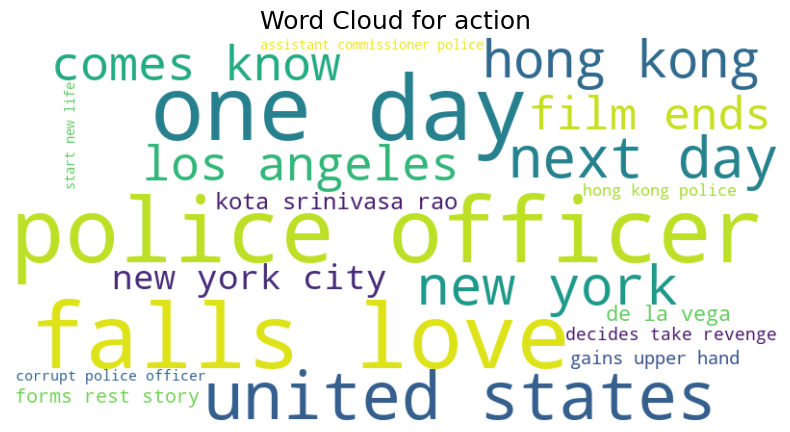

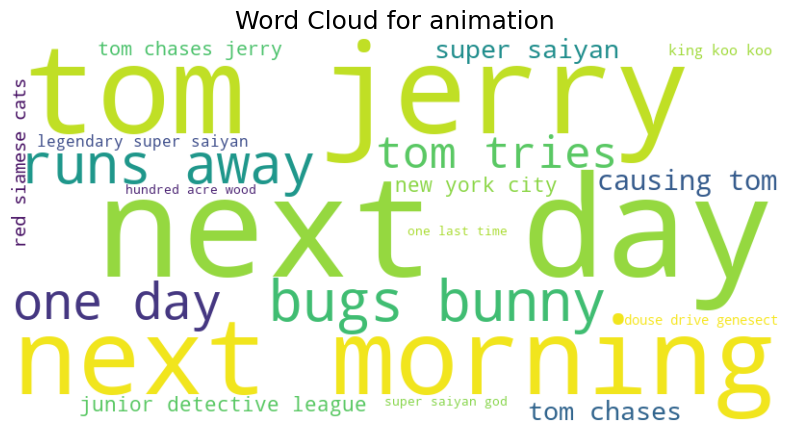

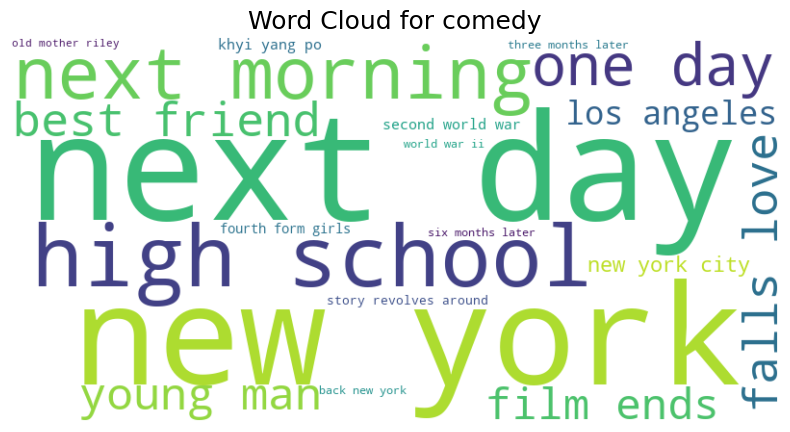

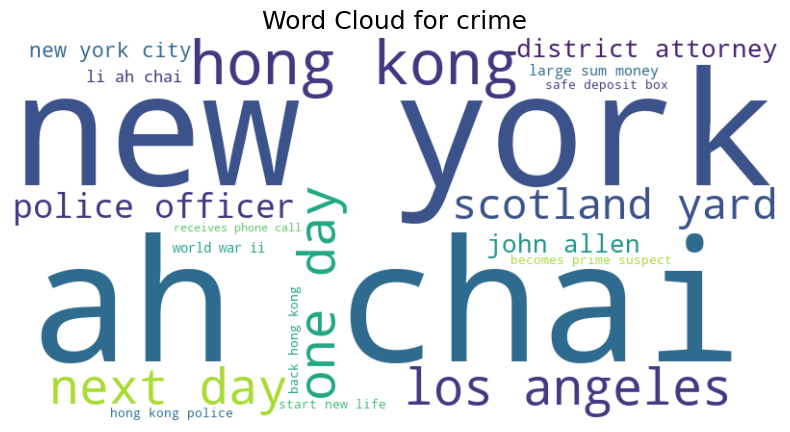

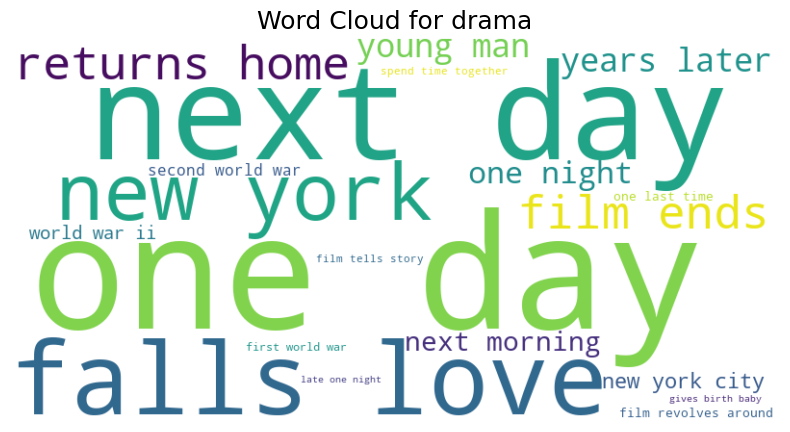

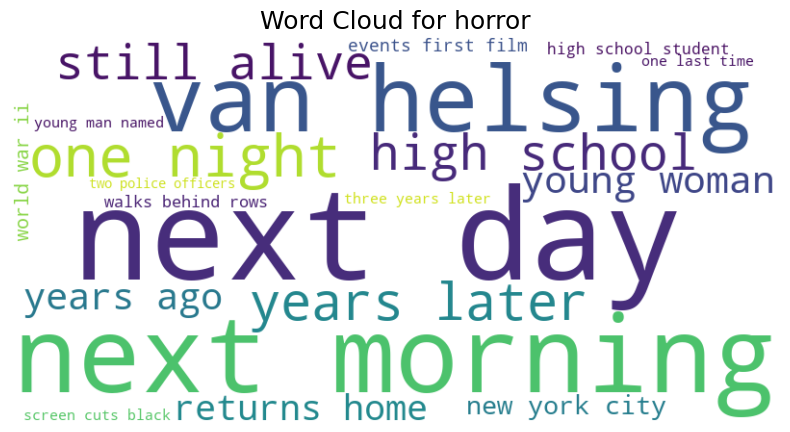

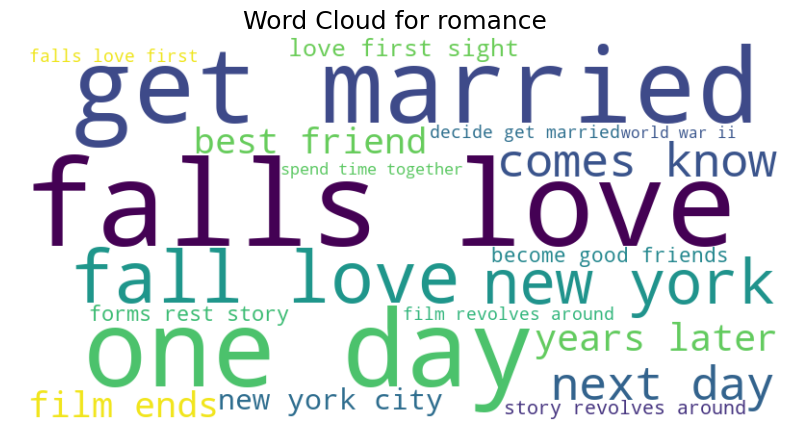

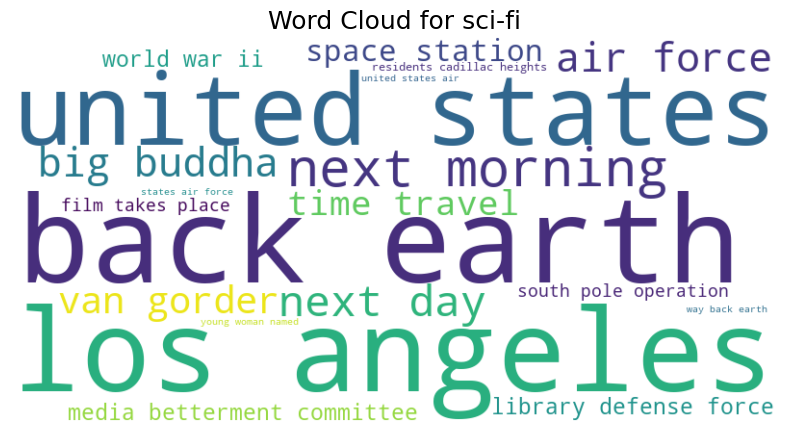

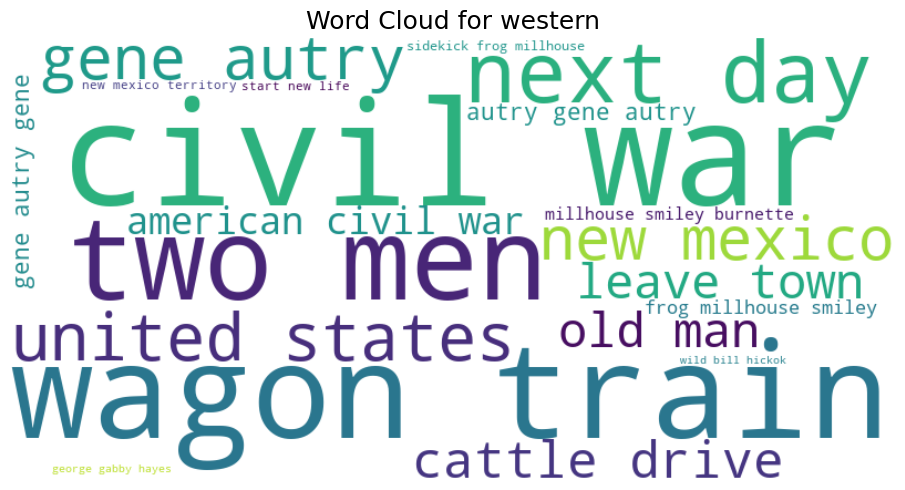

In [14]:
# Function to generate word cloud
def generate_wordcloud(ngram_counts, title):
    # Combine the words and counts into a single string for the word cloud
    word_freq = { ' '.join(k): v for k, v in ngram_counts.items() }
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Plotting the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')

# Generate and display word clouds for each friend
for genre in sorted(data['genre'].unique()):
    # Combine bigrams and trigrams for the word cloud
    combined_ngrams = bigrams_by_genre[genre] + trigrams_by_genre[genre]
    generate_wordcloud(dict(combined_ngrams), f'Word Cloud for {genre}')
    #just bigrams:
    #generate_wordcloud(dict(bigrams_by_genre[genre]), f'Word Cloud for {genre}')

plt.tight_layout()
plt.show()